In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
df_train= pd.read_csv('mnist_digit_data/mnist_train.csv')
df_test = pd.read_csv('mnist_digit_data/mnist_test.csv')

train = np.array(df_train)
test = np.array(df_test)

print(train.shape)
# print(train[0,:])
list(df_train.columns)
print(train)

(60000, 785)
[[5 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 ...
 [5 0 0 ... 0 0 0]
 [6 0 0 ... 0 0 0]
 [8 0 0 ... 0 0 0]]


In [4]:
x_train = train[:,1:]
y_train = np.expand_dims(train[:,0],axis=1)
print(x_train,x_train.shape)
print(y_train,y_train.shape)
# print(x_train[0])

x_test = test[:,1:]
y_test = np.expand_dims(test[:,0],axis=1)
# print(y_test.shape)
# print(x_test.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] (60000, 784)
[[5]
 [0]
 [4]
 ...
 [5]
 [6]
 [8]] (60000, 1)


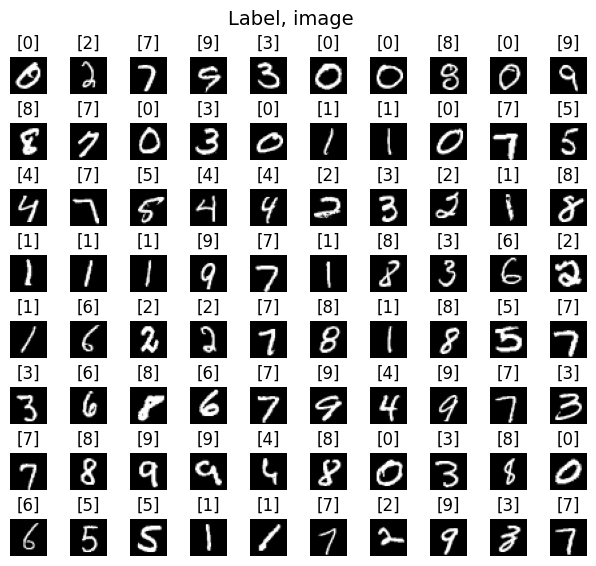

In [6]:
m,n = x_train.shape

fig,axes = plt.subplots(8,10, figsize=(6,6))
fig.tight_layout(pad=0,rect=[0, 0.03,1,0.91]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    x_random_reshaped = x_train[random_index].reshape((28,28))
    
    ax.imshow(x_random_reshaped, cmap='gray')
    
    ax.set_title(y_train[random_index])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

In [7]:
tf.random.set_seed(1234)

model = Sequential(
    [               
        tf.keras.Input(shape=(784,)),
        Dense(units = 100, activation='relu', name="L1"),
        Dense(units = 25, activation='relu', name="L2"),
        Dense(units = 10, activation='linear', name="L3"),
    ], name = "my_model" 
)

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(
    x_train,y_train,
    epochs=40
)

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7119
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6125
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3313
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2270
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1751
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1440
Epoch 7/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1275
Epoch 8/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1126
Epoch 9/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1011
Epoch 10/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0925
Epoch 11/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0861
Epoch 12/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0790
E

1/1 [==============================] - 0s 38ms/step
 
prediction : [[ 55.039326  89.55493   36.131287  67.821495  93.72322   51.82434
   14.139781  89.06056   73.57194  101.25928 ]]

probabily of prediction : [[8.4468081e-21 8.2533425e-06 5.1884252e-29 3.0055105e-15 5.3320575e-04
  3.3918954e-22 1.4596368e-38 5.0341705e-06 9.4472130e-13 9.9945349e-01]]

predicted number is: 9



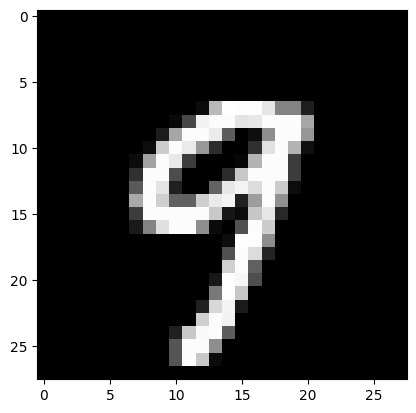

In [83]:
i=45
prediction = model.predict(x_train[i].reshape(1,784))
print(f" \nprediction : {prediction}\n")

predn_prob = tf.nn.softmax(prediction)
print(f"probabily of prediction : {predn_prob}\n")

pred_num = np.argmax(predn_prob)
print(f"predicted number is: {pred_num}\n")
p=x_train[i].reshape((28,28))
plt.imshow(p, cmap='gray')

1/1 [==============================] - 0s 20ms/step


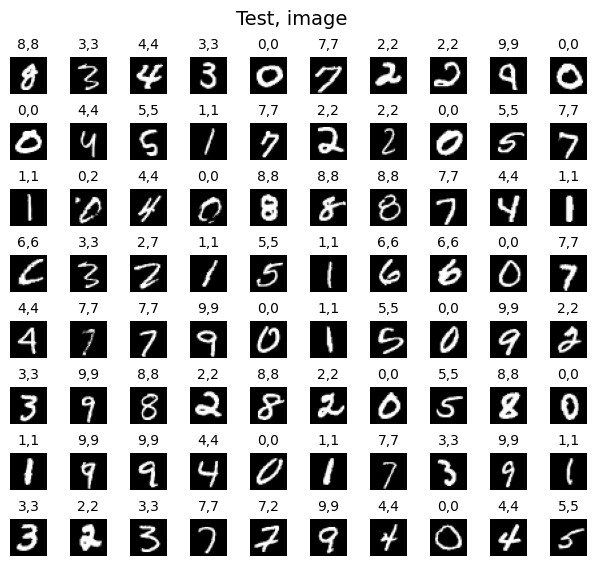

In [125]:
m,n = x_test.shape

fig,axes = plt.subplots(8,10, figsize=(6,6))
fig.tight_layout(pad=0,rect=[0, 0.03,1,0.91]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    x_rand_reshaped = x_test[random_index].reshape((28,28))
    
    predn = model.predict(x_test[random_index].reshape(1,784))
    predn_p = tf.nn.softmax(predn)
    yhat = np.argmax(predn_p)
    
    ax.imshow(x_rand_reshaped, cmap='gray')
    
    ax.set_title(f"{y_test[random_index,0]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Test, image", fontsize=14)
plt.show()

In [126]:
pred = model.predict(x_test.reshape(10000,784))
pred_prob = tf.nn.softmax(pred)


count=0
for i in range(10000):
    pred_num = np.argmax(pred_prob[i])
    if (y_test[i]==pred_num):
        count+=1
    else:
        count+=0
        
eff = (count/10000)*100
print(f"efficiency of the algorithm is : {eff}")


313/313 [==============================] - 1s 2ms/step
efficiency of the algorithm is : 97.1


In [129]:
[layer1, layer2, layer3] = model.layers
w1,b1 = layer1.get_weights()
w2,b2 = layer2.get_weights()
w3,b3 = layer3.get_weights()
print(f"W1 shape = {w1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {w2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {w3.shape}, b3 shape = {b3.shape}")

W1 shape = (784, 100), b1 shape = (100,)
W2 shape = (100, 25), b2 shape = (25,)
W3 shape = (25, 10), b3 shape = (10,)
